## Model validation on the Iris dataset

In [26]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers
%matplotlib inline

# If you would like to make further imports from tensorflow, add them here



In [3]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    
    If you would like to import any further packages to aid you in this task, please do so in the 
    Package Imports cell above.
    """
    input1=iris_data["data"]
    target=iris_data["target"]
    input2=(input1-np.mean(input1,axis=0))/np.std(input1)
    X_train,X_test,y_train,y_test=model_selection.train_test_split(input2,target,test_size=0.2)
    return X_train,X_test,y_train,y_test
    

In [4]:
# Run your function to generate the test and training data.
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)


In [5]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Compile the model

You should now compile the model using the `compile` method. Remember that you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [9]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    
    

In [16]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    history=model.fit(train_data,train_targets,epochs=epochs,validation_split=0.1)
    return history
    

Run the following cell to run the training for 800 epochs.

In [28]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_regularised_model(input_shape, dropout_rate, weight_decay):
    
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    model=Sequential([
        Dense(64,kernel_initializer="he_uniform",bias_initializer="ones",input_shape=input_shape),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dropout(dropout_rate),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dropout(dropout_rate),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay),activation="relu"),
        Dense(3,activation="softmax")
    ])
    return model
    
    

In [29]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [30]:
# Compile the model

compile_model(reg_model)

In [31]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 108 samples, validate on 12 samples
Epoch 1/800
108/108 [==============================] - 2s 22ms/sample - loss: 1.7852 - accuracy: 0.5741 - val_loss: 1.6711 - val_accuracy: 0.7500
Epoch 2/800
108/108 [==============================] - 0s 979us/sample - loss: 1.5420 - accuracy: 0.7500 - val_loss: 1.4685 - val_accuracy: 0.6667
Epoch 3/800
108/108 [==============================] - 0s 2ms/sample - loss: 1.3033 - accuracy: 0.7407 - val_loss: 1.1815 - val_accuracy: 0.7500
Epoch 4/800
108/108 [==============================] - 0s 2ms/sample - loss: 1.0639 - accuracy: 0.8796 - val_loss: 0.9942 - val_accuracy: 0.9167
Epoch 5/800
108/108 [==============================] - 0s 993us/sample - loss: 0.9832 - accuracy: 0.8796 - val_loss: 0.9198 - val_accuracy: 0.9167
Epoch 6/800
108/108 [==============================] - 0s 2ms/sample - loss: 0.9004 - accuracy: 0.8981 - val_loss: 0.9279 - val_accuracy: 0.9167
Epoch 7/800
108/108 [==============================] - 0s 1ms/sample - loss: 0.8

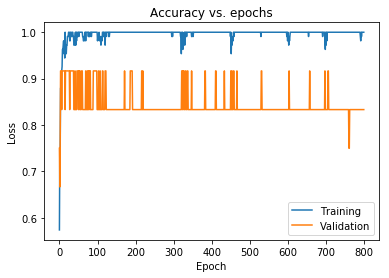

In [32]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

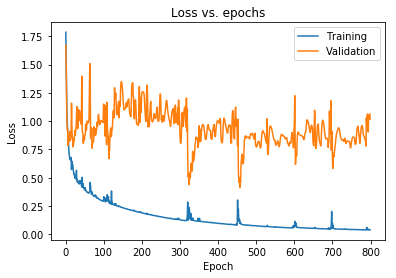

In [33]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [61]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.
from tensorflow.keras.callbacks import Callback
def get_callbacks():
    """This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    early_stopping=tf.keras.callbacks.EarlyStopping(patience=30,mode="min"),
    learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,patience=20)
    return early_stopping,learning_rate_reduction
    
    

In [63]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[*early_stopping, learning_rate_reduction], verbose=0)

In [68]:
print(learning_rate_reduction.patience)

20


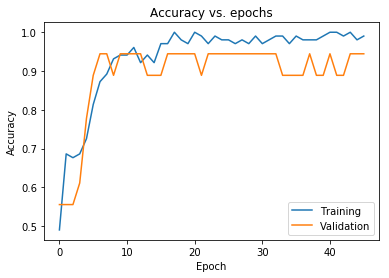

In [65]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

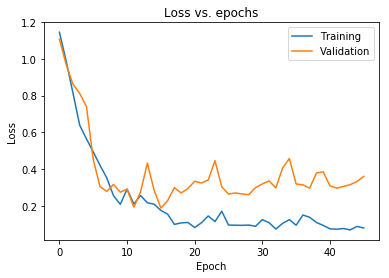

In [66]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [67]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.225
Test accuracy: 96.67%
